# 10-Year 2015 Record Temperature

An NOAA dataset has been stored in the file `weather.csv`. This data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, I will:

1. Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Remove leap days (i.e. February 29th) from the dataset for the purpose of this visualization.

The data contains values from stations near **Harrison, New Jersey, United States**

C:\Users\Landrover\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Landrover\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Landrover\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<IPython.core.display.Javascript object>


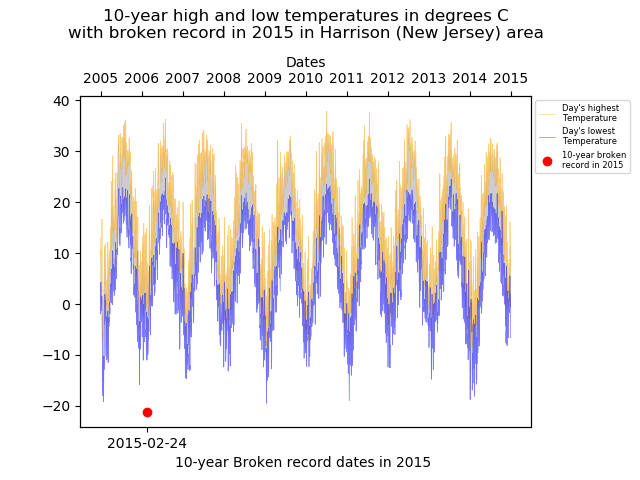

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
from datetime import datetime as dt
import os
import calendar
%matplotlib notebook

weather_file = os.path.join("Resources", "weather.csv")

#Creating output image directory and file
output_dir = os.path.join("Images", "Temperature.png")
if not os.path.exists("Images"):
    os.mkdir("Images")
    
#Importing and cleaning, also creating the 2015 broken records data
df=pd.read_csv(weather_file)
maxtemp=df[df['Element']=='TMAX'].rename(columns={'Data_Value':'TMAX'})
mintemp=df[df['Element']=='TMIN'].rename(columns={'Data_Value':'TMIN'})
temperature = pd.merge(maxtemp.loc[:,['Date','ID','TMAX']], mintemp.loc[:,['Date','ID','TMIN']], how='outer', left_on=['Date','ID'], right_on=['Date','ID'])
dailytemp = pd.DataFrame(pd.Series(temperature['Date'].unique()).sort_values(ascending=True),columns=['Date']).reset_index(drop=True)
dailytemp['TMAX']=[np.mean(frame['TMAX'].dropna())/10 for group, frame in temperature.groupby('Date')]
dailytemp['TMIN']=[np.mean(frame['TMIN'].dropna())/10 for group, frame in temperature.groupby('Date')]
daily2015=dailytemp[dailytemp['Date']>='2015-01-01']
dailyb42015=dailytemp[dailytemp['Date']<'2015-01-01']
daily2015['Date'] = pd.to_datetime(daily2015['Date'])
dailyb42015['Date'] = pd.to_datetime(dailyb42015['Date'])
dailyb42015=dailyb42015.set_index('Date') #cleaned data with column for low temp and a column for high temp
minimum=np.min(dailyb42015['TMIN'])
maximum=np.max(dailyb42015['TMAX'])
daily2015low=daily2015[daily2015['TMIN']<minimum]
daily2015low['Record']=daily2015low['TMIN']
daily2015high=daily2015[daily2015['TMAX']>maximum]
daily2015high['Record']=daily2015high['TMAX']
daily2015=pd.merge(daily2015low.loc[:,['Date','Record']], daily2015high.loc[:,['Date','Record']], how='outer', left_on=['Date','Record'], right_on=['Date','Record'])
daily2015=daily2015.set_index('Date').dropna() #2015 broken records


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#Plotting the daily high temperature
lns1=ax2.plot(dailyb42015['TMAX'],'-', color='orange', linewidth=0.5, alpha=0.5, label="Day's highest\nTemperature")

#Plotting the daily low temperature
lns2=ax2.plot(dailyb42015['TMIN'],'-', color='blue', linewidth=0.5, alpha=0.5, label="Day's lowest\nTemperature")

#Shading The area between the record high and record low temperatures
ax2.fill_between(dailyb42015.index,dailyb42015['TMAX'], dailyb42015['TMIN'], facecolor='0.8')
ax2.set_xlabel(r"Dates")

#Function to format and get the dates for the 2015 records
def tick_function(X):
    return [z.date() for z in X]

#Scatter plot of the 2015 broken records
lns3=ax1.plot(daily2015['Record'],'o', color='r', label="10-year broken\nrecord in 2015")
ax1.set_xticks(daily2015.index)
ax1.set_xticklabels(tick_function(daily2015.index))
ax1.set_xlim('2015-01-01', '2015-12-31')
ax1.set_xlabel(r"10-year Broken record dates in 2015 ")
ax=plt.gca()

    
# adjust the plot so the title text doesn't run off the image
plt.subplots_adjust(top=0.80)

#Setting the background to White
ax.set_facecolor('white')

#removing the grid
ax.grid(False)

# add a title
plt.title('10-year high and low temperatures in degrees C\nwith broken record in 2015 in Harrison (New Jersey) area',y=1.15)


#Add a legend at the top right
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.0, 1.0), prop={'size': 6})

#Adjust the right side to see the legend
plt.subplots_adjust(right=0.83)

fig.savefig(output_dir)
